# Primary Env

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


# Secondary Env

In [137]:
# scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [141]:
#helpers

from sklearn.model_selection import train_test_split

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

ImportError: cannot import name 'DistanceMetric' from 'sklearn.metrics' (c:\python\lib\site-packages\sklearn\metrics\__init__.py)

In [140]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

ImportError: cannot import name 'DistanceMetric' from 'sklearn.metrics' (c:\python\lib\site-packages\sklearn\metrics\__init__.py)

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report, confusion_matrix, mean_squared_error, r2_score

In [54]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [1]:
# functions

In [5]:
def drop_columns(df, columns):
    df.drop(columns, axis=1, inplace=True, errors='ignore')


def drop_duplicates(df):
    df_train.drop_duplicates(inplace=True)


def mark_minus_invalids_as_nan(df, columns):
    for col in columns:
        # df[df[col]<0][col]=np.nan
        df.loc[df[col] < 0, col] = np.nan


def set_nan(df, bounds):
    data = df.copy()
    for key in bounds.keys():
        # print("values",bounds[key])
        data.loc[data[key] < bounds[key][0], key] = np.nan
        data.loc[data[key] > bounds[key][1], key] = np.nan
    return data


def isNaN(num):
    if float('-inf') < float(num) < float('inf'):
        return False
    else:
        return True


def categorical_features_imputation_by_mode(df, features):
    for f in features:
        mode = df_train[~df_train[f].isnull()][f].value_counts().idxmax()
        # print(mode)
        df[f] = df[f].fillna(mode)
    return df


def regression_imputation(df, sets):
    for s in sets:
        # print(s)
        df.loc[df[s[0]].isnull() & df[s[1]].isnull(), s[0]] = df[s[0]].median()
        df.loc[df[s[0]].isnull() & df[s[1]].isnull(), s[1]] = df[s[1]].median()

        # print(df_test.iloc[[357]])
        # return
        lr_0 = LinearRegression()
        lr_1 = LinearRegression()
        valid = df.dropna(subset=s)
        # train_set_0 =df.dropna(subset=[s[0]])[s]
        # train_set_1 =df.dropna(subset=[s[1]])[s]
        # return valid

        a = valid[[s[0]]]
        b = valid[[s[1]]]
        # print(a)
        lr_0.fit(a, b)
        lr_1.fit(b, a)
        #
        #
        #
        for i in df.index:
            if isNaN(df[s[0]][i]):
                v = np.array([[df[s[1]][i]]])
                # print(i,df[s[0]][i],v)
                # return
                df[s[0]][i] = lr_1.predict(v)[0][0]

            elif isNaN(df[s[1]][i]):
                v = np.array([[df[s[0]][i]]])

                df[s[1]][i] = lr_0.predict(v)[0][0]

    return df
    # df.loc[df[s[1]].isnull(),s[1]] = lr_0.predict(df[[s[0]]])[df[s[1]].isnull()]
    # df.loc[df[s[0]].isnull(),s[0]] = lr_1.predict(df[[s[1]]])[df[s[0]].isnull()]


def handle_missing_by_median(df, features):
    data = df.copy()
    for feature in features:
        data.loc[data[feature].isnull(), feature] = df[feature].median()
    return data

# Getting Dataset

In [10]:
df_train = pd.read_csv('Train_Dataset.csv')
df_test= pd.read_csv('Test_Dataset.csv')

# Keep Baseline set

In [11]:
df_baseline_train = df_train.copy()
df_baseline_test = df_test.copy()

# Data Preprocessing

In [12]:
df_train.shape,df_test.shape

((2321, 21), (1500, 21))

In [13]:
drop_features = ['customer_id', 'Unnamed: 19', 'Unnamed: 20']
drop_columns(df_train, drop_features)
drop_columns(df_test, drop_features)

In [14]:
df_train.shape,df_test.shape

((2321, 19), (1500, 18))

#### remove duplicates

In [15]:
df_train.duplicated().sum(),df_test.duplicated().sum()

4

0

In [17]:
drop_duplicates(df_train)
drop_duplicates(df_test)

In [18]:
df_train.duplicated().sum(),df_test.duplicated().sum()

0

### Data types identify

#### View Categorical

In [20]:
train_categorical = ['intertiol_plan', 'voice_mail_plan', 'Churn', 'location_code']
test_categorical = ['intertiol_plan', 'voice_mail_plan', 'location_code']
numerical = ['account_length',
             'number_vm_messages',
             'total_day_min',
             'total_day_calls',
             'total_day_charge',
             'total_eve_min',
             'total_eve_calls',
             'total_eve_charge',
             'total_night_minutes',
             'total_night_calls',
             'total_night_charge',
             'total_intl_minutes',
             'total_intl_calls',
             'total_intl_charge',
             'customer_service_calls']

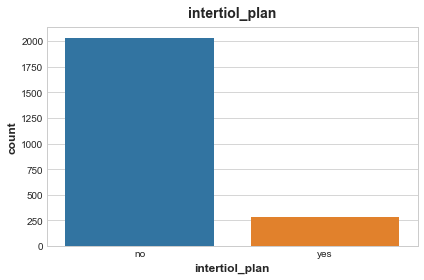

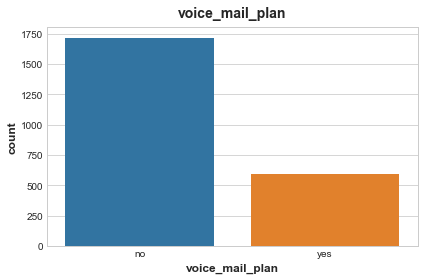

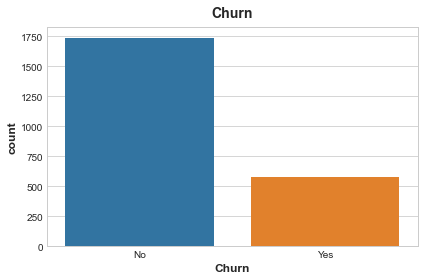

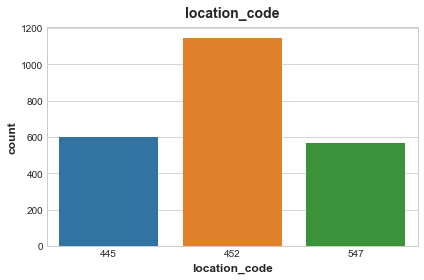

In [21]:
for f in train_categorical:
    ax = sns.countplot(x = df_train[f], data = df_train)
    plt.title(f)
    plt.show()


#### View Numerical

c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated 

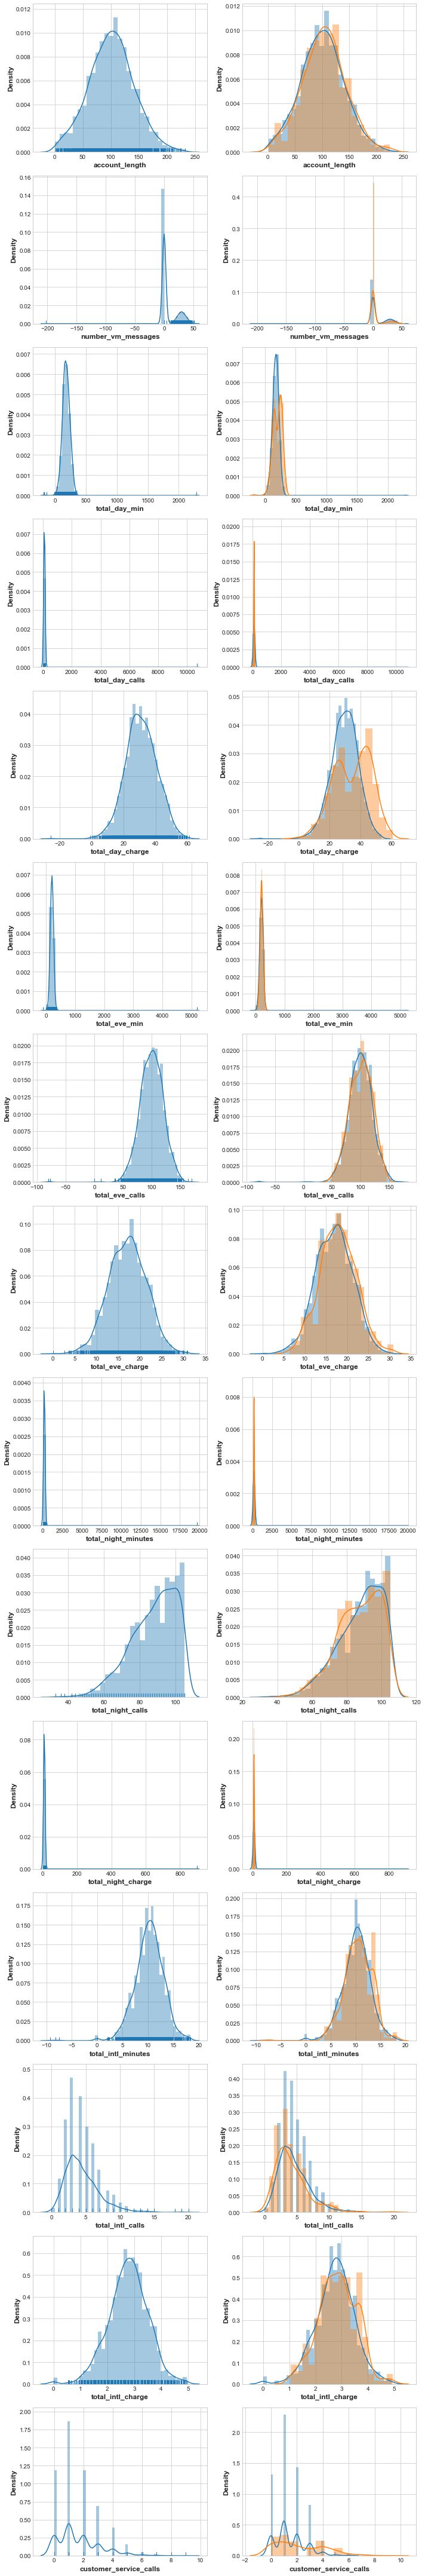

In [22]:
fig, axs = plt.subplots(len(numerical), 2, figsize=(10, 4*len(numerical)))
for i,f in enumerate(numerical):
    # print(i,f)
    sns.distplot(df_train[f],rug=True,ax=axs[i][0])
    sns.distplot(df_train[f][df_train.Churn=='No'],ax=axs[i][1])
    sns.distplot(df_train[f][df_train.Churn=='Yes'],ax=axs[i][1])
plt.show()

#### Check null values

In [23]:
df_train.isnull().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        3
total_day_min             1
total_day_calls           3
total_day_charge          5
total_eve_min             3
total_eve_calls           4
total_eve_charge          8
total_night_minutes       2
total_night_calls         5
total_night_charge        5
total_intl_minutes        2
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     5
dtype: int64

In [24]:
df_test.isnull().sum()

account_length            0
location_code             2
intertiol_plan            4
voice_mail_plan           4
number_vm_messages        1
total_day_min             3
total_day_calls           3
total_day_charge          4
total_eve_min             2
total_eve_calls           0
total_eve_charge          9
total_night_minutes       3
total_night_calls         2
total_night_charge        2
total_intl_minutes        2
total_intl_calls          3
total_intl_charge         0
customer_service_calls    1
dtype: int64

#### Check outliers

In [27]:
def check_outliers_by_visualisation(df,features):
    x=len(features)
    fig, axs = plt.subplots(x, 2, figsize=(10, 4*x))
    for i,f in enumerate(features):
        # print(i,f)
        sns.distplot(df[f],rug=True,ax=axs[i][0])
        sns.boxplot(x =f, data = df,ax=axs[i][1])
    plt.show()

c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no l

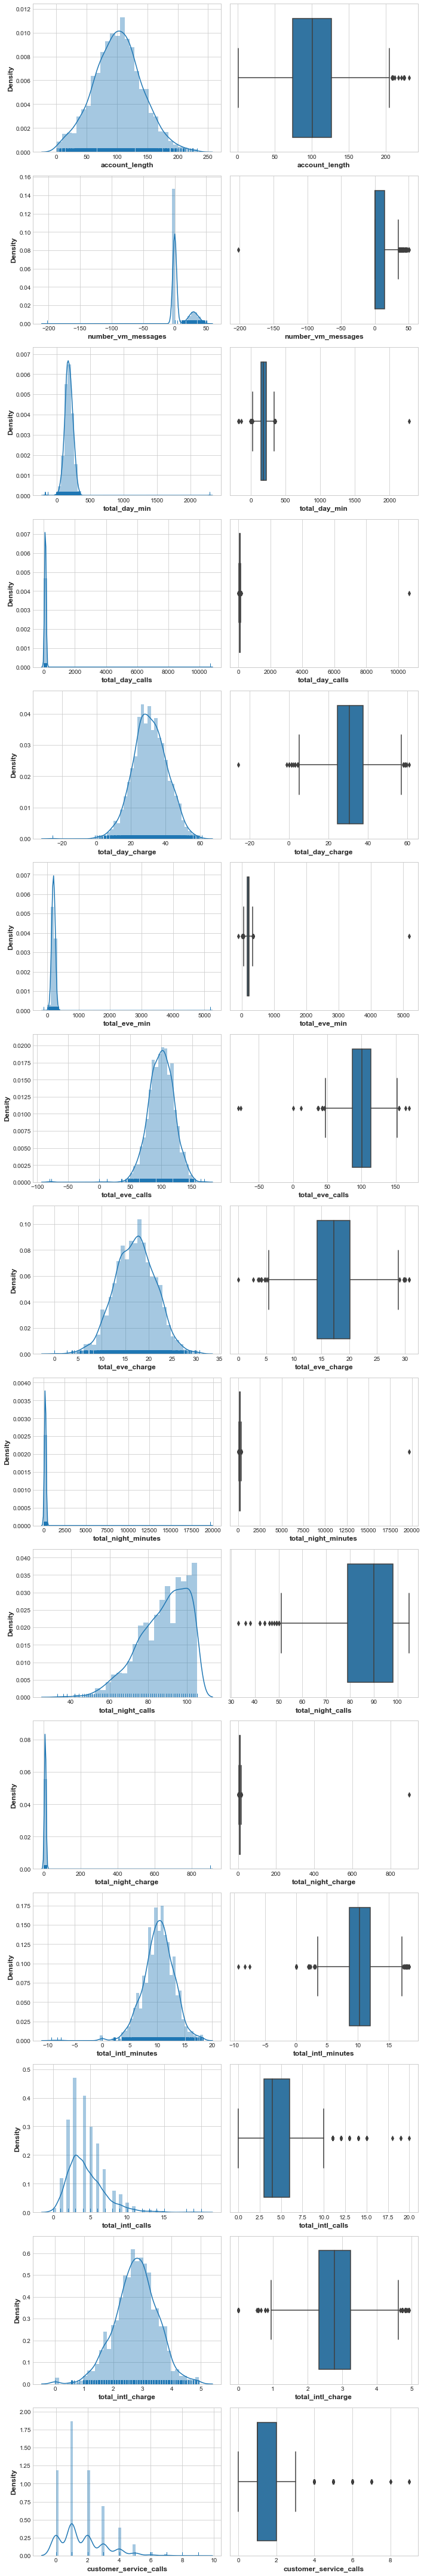

In [28]:
check_outliers_by_visualisation(df_train,numerical)

##### mark minus values as nan before the handle

In [29]:
mark_minus_invalids_as_nan(df_train, numerical)
mark_minus_invalids_as_nan(df_test, numerical)

In [30]:
df_train.isnull().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        4
total_day_min             5
total_day_calls           4
total_day_charge          7
total_eve_min             4
total_eve_calls           6
total_eve_charge          8
total_night_minutes       2
total_night_calls         5
total_night_charge        5
total_intl_minutes        5
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     5
dtype: int64

In [31]:
df_test.isnull().sum()

account_length            0
location_code             2
intertiol_plan            4
voice_mail_plan           4
number_vm_messages        1
total_day_min             3
total_day_calls           4
total_day_charge          6
total_eve_min             2
total_eve_calls           0
total_eve_charge          9
total_night_minutes       4
total_night_calls         2
total_night_charge        2
total_intl_minutes        2
total_intl_calls          4
total_intl_charge         0
customer_service_calls    1
dtype: int64

#### checking null values suggested the boundry for it

In [32]:
suggested_bounds = {'account_length': [0, 250],
                    'number_vm_messages': [0, 51],
                    'total_day_min': [0, 500],
                    'total_day_calls': [0, 800],
                    'total_day_charge': [0, 61],
                    'total_eve_min': [0, 800],
                    'total_eve_calls': [0, 170],
                    'total_eve_charge': [0, 31],
                    'total_night_minutes': [0, 800],
                    'total_night_calls': [0, 175],
                    'total_night_charge': [0, 200],
                    'total_intl_minutes': [0, 25],
                    'total_intl_calls': [0, 20],
                    'total_intl_charge': [0, 10],
                    'customer_service_calls': [0, 10]}

In [33]:
df_train = set_nan(df_train, suggested_bounds)
df_test = set_nan(df_test, suggested_bounds)

In [34]:
df_train.isnull().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        4
total_day_min             6
total_day_calls           5
total_day_charge          7
total_eve_min             5
total_eve_calls           6
total_eve_charge          8
total_night_minutes       3
total_night_calls         5
total_night_charge        6
total_intl_minutes        5
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     5
dtype: int64

In [35]:
df_test.isnull().sum()

account_length            0
location_code             2
intertiol_plan            4
voice_mail_plan           4
number_vm_messages        1
total_day_min             3
total_day_calls           4
total_day_charge          6
total_eve_min             2
total_eve_calls           0
total_eve_charge          9
total_night_minutes       4
total_night_calls         2
total_night_charge        2
total_intl_minutes        2
total_intl_calls          4
total_intl_charge         0
customer_service_calls    1
dtype: int64

##### Correlations helps to handle nan values

<AxesSubplot:>

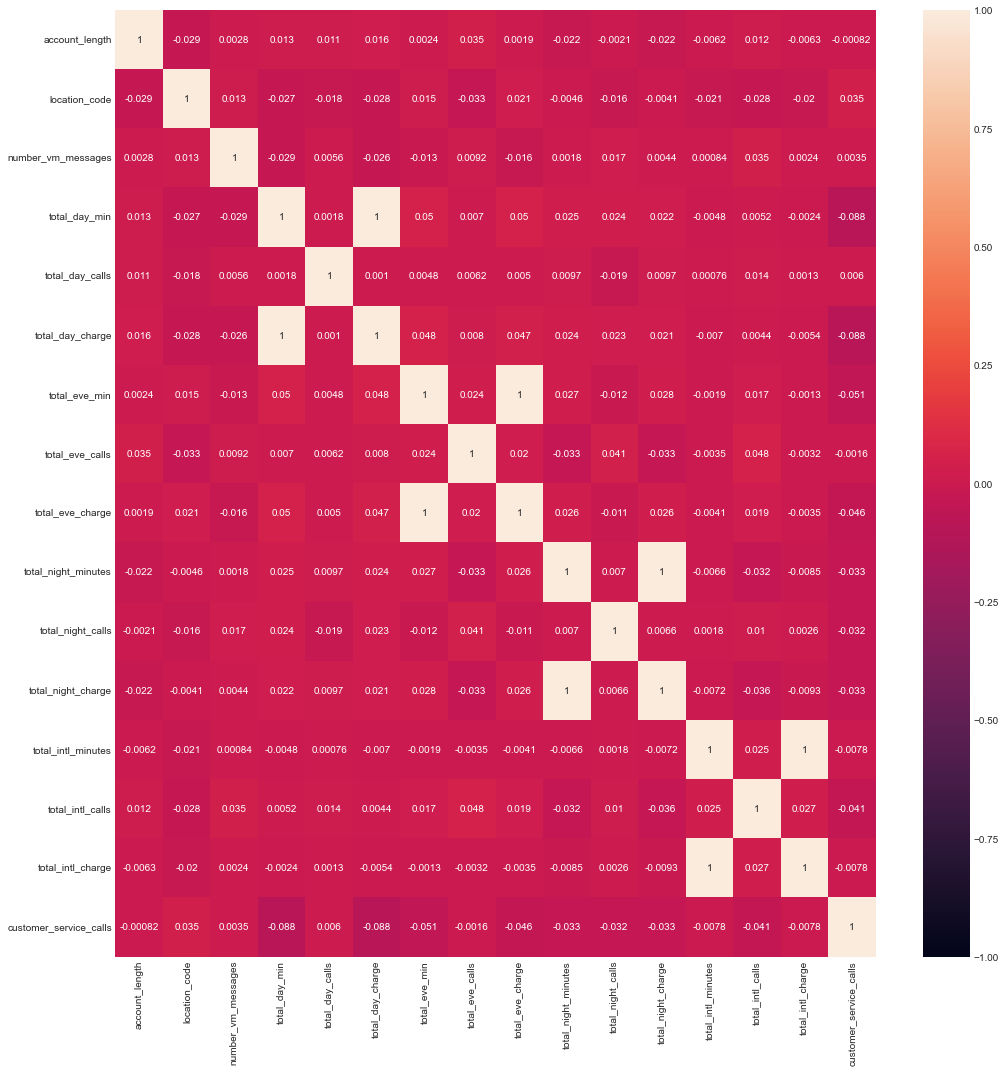

In [36]:
corr_train = df_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_train, vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

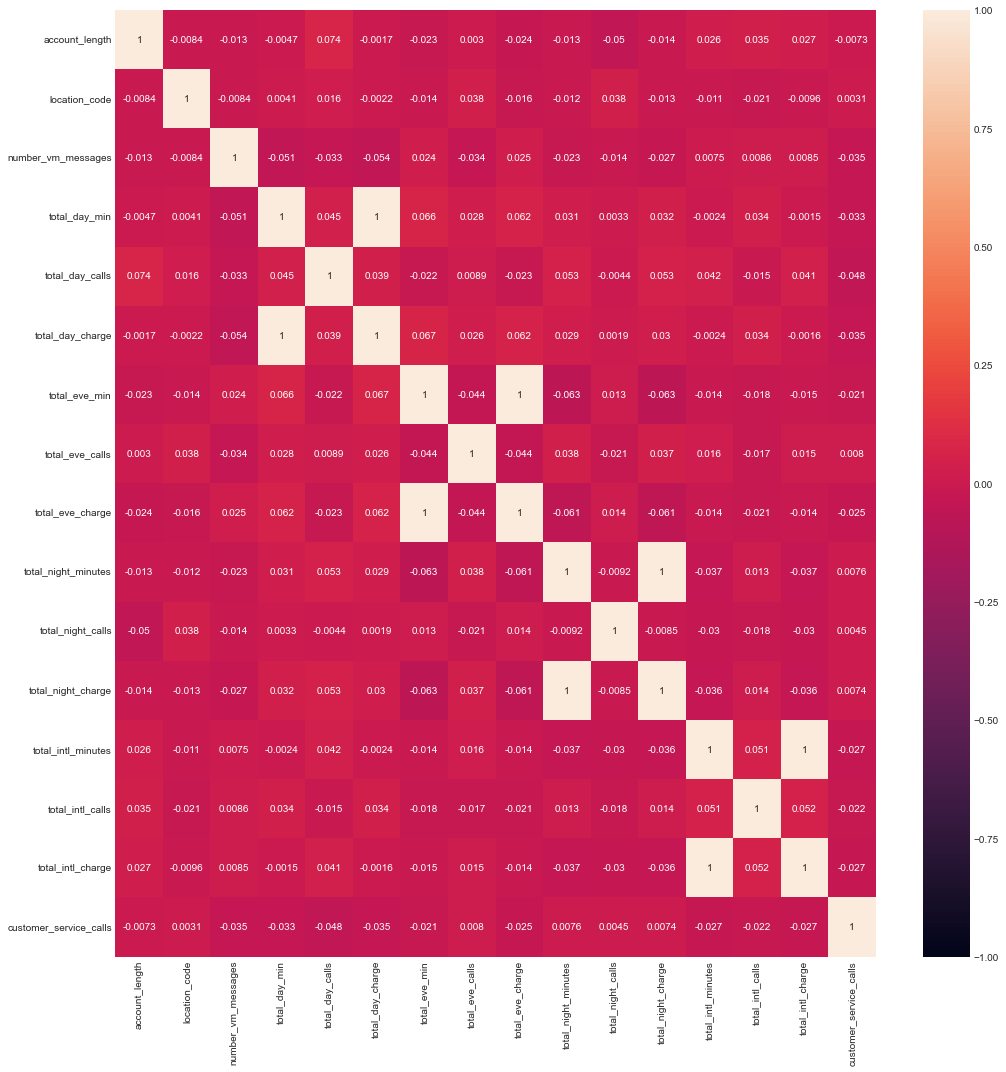

In [37]:
corr_test = df_test.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_test, vmin=-1, vmax=1, annot=True)

##### handle highly correlated fields missing values

In [38]:
correlated_sets = [['total_day_charge', 'total_day_min'],
                   ['total_eve_charge', 'total_eve_min'],
                   ['total_night_charge', 'total_night_minutes'],
                   ['total_intl_charge', 'total_intl_minutes']]

In [39]:
df_train = regression_imputation(df_train, correlated_sets)
df_test = regression_imputation(df_test, correlated_sets)

C:\Users\Ayesh\AppData\Local\Temp\ipykernel_23944\3391119227.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s[0]][i] = lr_1.predict(v)[0][0]
C:\Users\Ayesh\AppData\Local\Temp\ipykernel_23944\3391119227.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s[0]][i] = lr_1.predict(v)[0][0]
C:\Users\Ayesh\AppData\Local\Temp\ipykernel_23944\3391119227.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s[1]][i] = lr_0.predic

##### handle rest of outliers by

In [42]:
# for numerical
df_train = handle_missing_by_median(df_train, numerical)
df_test = handle_missing_by_median(df_test, numerical)

In [43]:
# for categorical
df_train = categorical_features_imputation_by_mode(df_train, train_categorical)
df_test = categorical_features_imputation_by_mode(df_test, test_categorical)

In [45]:
df_train.isnull().sum()

account_length            0
location_code             0
intertiol_plan            0
voice_mail_plan           0
number_vm_messages        0
total_day_min             0
total_day_calls           0
total_day_charge          0
total_eve_min             0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
Churn                     0
dtype: int64

In [44]:
df_test.isnull().sum()

account_length            0
location_code             0
intertiol_plan            0
voice_mail_plan           0
number_vm_messages        0
total_day_min             0
total_day_calls           0
total_day_charge          0
total_eve_min             0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
dtype: int64

# Encoding

#### encoding international plan

In [47]:
df_train.intertiol_plan.replace('no',0,inplace=True)
df_train.intertiol_plan.replace('yes',1,inplace=True)

df_test.intertiol_plan.replace('no',0,inplace=True)
df_test.intertiol_plan.replace('yes',1,inplace=True)

#### encoding voice mail plan

In [48]:
df_train.voice_mail_plan.replace('no',0,inplace=True)
df_train.voice_mail_plan.replace('yes',1,inplace=True)

df_test.voice_mail_plan.replace('no',0,inplace=True)
df_test.voice_mail_plan.replace('yes',1,inplace=True)


#### encoding Churn

In [49]:
df_train.Churn.replace('No',0,inplace=True)
df_train.Churn.replace('Yes',1,inplace=True)

In [50]:
def one_hot_encoding(df,feature):
    data =df.copy()
    onehot = OneHotEncoder()
    onehot.fit(data[[feature]])

    encoded = onehot.transform(data[[feature]])
    data[onehot.categories_[0]] = encoded.toarray()
    return data.drop(feature, axis=1)


In [51]:
df_train=one_hot_encoding(df_train,'location_code')
df_test=one_hot_encoding(df_test,'location_code')

In [52]:
df_train.head()

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,445,452,547
0,15.0,0,0,0.0,121.1,130.0,20.59,216.0,86.0,18.36,...,33.0,10.58,16.1,5.0,4.35,2.0,0,0.0,1.0,0.0
1,105.0,0,0,0.0,259.3,96.0,44.08,175.2,97.0,14.89,...,36.0,10.01,12.0,5.0,3.24,3.0,0,0.0,1.0,0.0
2,97.0,0,1,32.0,183.4,94.0,31.18,269.1,120.0,22.87,...,38.0,9.16,6.7,4.0,1.81,5.0,0,0.0,1.0,0.0
3,121.0,0,1,35.0,68.7,95.0,11.68,209.2,69.0,17.78,...,42.0,8.88,11.4,4.0,3.08,1.0,0,1.0,0.0,0.0
4,98.0,0,1,22.0,278.3,89.0,47.31,93.4,143.0,7.94,...,42.0,4.84,9.7,5.0,2.62,0.0,0,0.0,1.0,0.0


#### Pearsoner

In [62]:
# def pearsonr(x, y):
#     # Assume len(x) == len(y)
#     n = len(x)
#     sum_x = float(sum(x))
#     sum_y = float(sum(y))
#     sum_x_sq = sum(xi*xi for xi in x)
#     sum_y_sq = sum(yi*yi for yi in y)
#     psum = sum(xi*yi for xi, yi in zip(x, y))
#     num = psum - (sum_x * sum_y/n)
#     den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
#     if den == 0: return 0
#     return num / den

In [63]:
# pearsonr(df_train['total_day_charge'], df_train['total_day_min'])

0.9967231534695519

In [60]:
def compare_2(df,x,y):
    graph = sns.jointplot(data=df,x=x, y=y ,kind='reg')
    r, p = stats.pearsonr(df[x], df[y])
    # if you choose to write your own legend, then you should adjust the properties then
    phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
    # here graph is not a ax but a joint grid, so we access the axis through ax_joint method

    graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])


In [67]:
# def joint_plot(df,target,features):
#     for fea in  features:
#         compare_2(df_train,x=fea,y=target)


In [68]:
# joint_plot(df_train,'Churn',features=numerical)

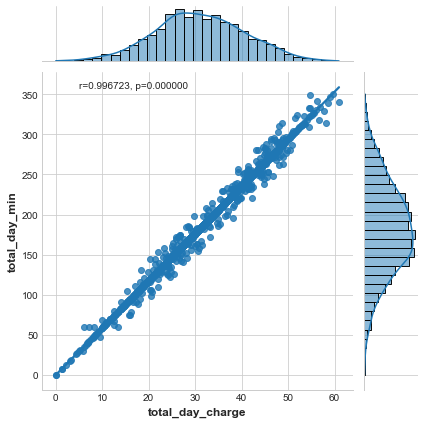

In [61]:
compare_2(df_train,x='total_day_charge',y='total_day_min')

<AxesSubplot:>

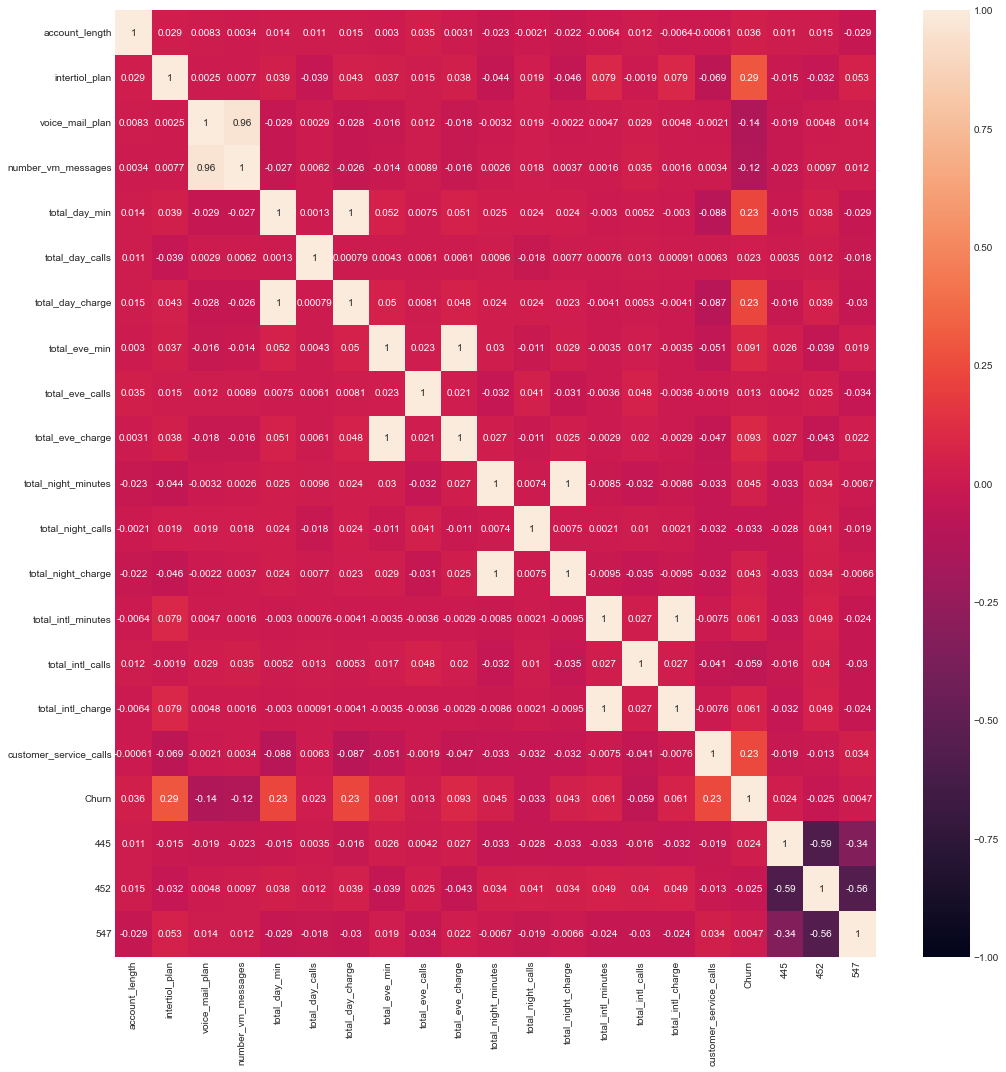

In [72]:
corr_train = df_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_train, vmin=-1, vmax=1, annot=True)

In [70]:
numerical

['account_length',
 'number_vm_messages',
 'total_day_min',
 'total_day_calls',
 'total_day_charge',
 'total_eve_min',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls']

#### Add new features

In [80]:
df_train['total_charge']= df_train['total_intl_charge']+df_train['total_night_charge']+df_train['total_eve_charge']+df_train['total_day_charge']
df_test['total_charge']= df_test['total_intl_charge']+df_test['total_night_charge']+df_test['total_eve_charge']+df_test['total_day_charge']

In [81]:
df_train['total_calls']= df_train['total_intl_calls']+df_train['total_night_calls']+df_train['total_eve_calls']+df_train['total_day_calls']
df_test['total_calls']= df_test['total_intl_calls']+df_test['total_night_calls']+df_test['total_eve_calls']+df_test['total_day_calls']

In [82]:
df_train['total_min']= df_train['total_intl_minutes']+df_train['total_night_minutes']+df_train['total_eve_min']+df_train['total_day_min']
df_test['total_min']= df_test['total_intl_minutes']+df_test['total_night_minutes']+df_test['total_eve_min']+df_test['total_day_min']

<AxesSubplot:>

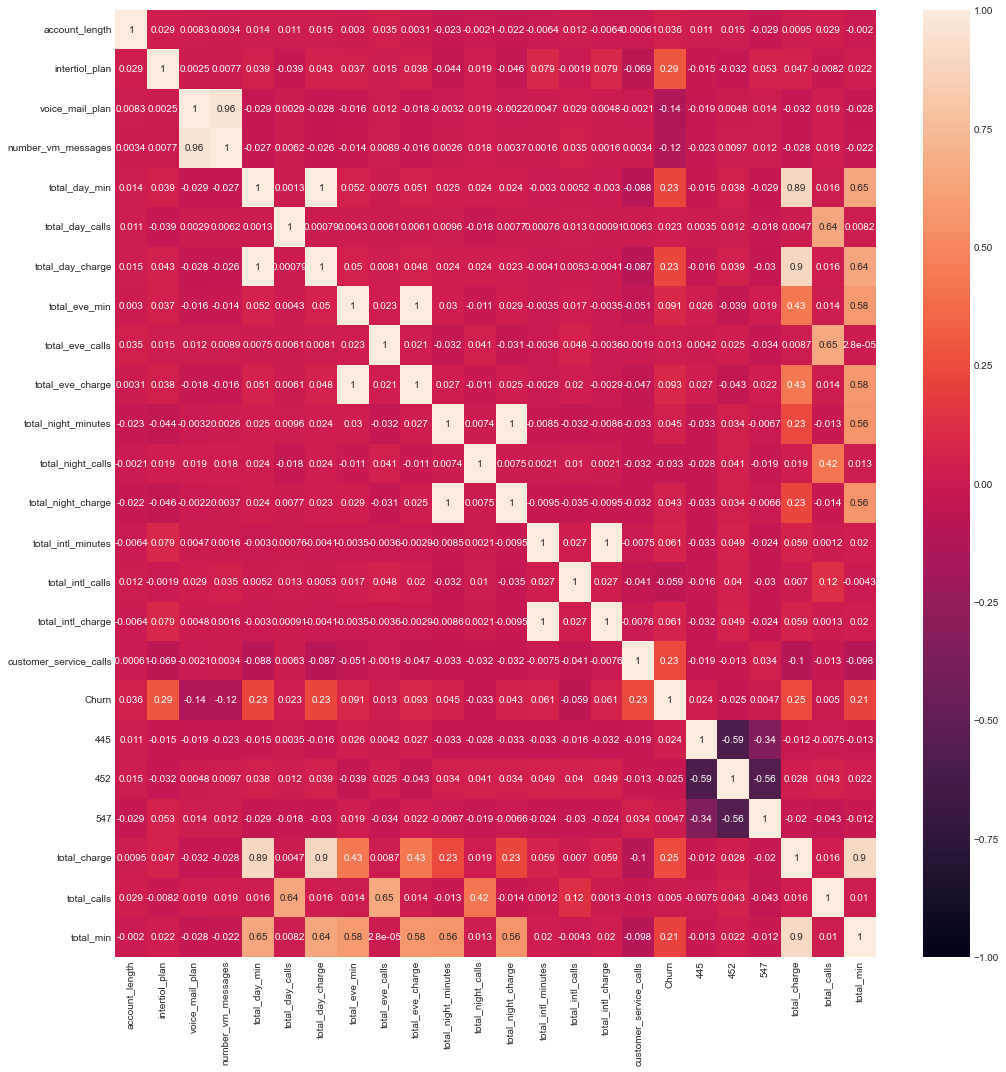

In [83]:
corr_train = df_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_train, vmin=-1, vmax=1, annot=True)

In [85]:
df_train.columns

Index([        'account_length',         'intertiol_plan',
              'voice_mail_plan',     'number_vm_messages',
                'total_day_min',        'total_day_calls',
             'total_day_charge',          'total_eve_min',
              'total_eve_calls',       'total_eve_charge',
          'total_night_minutes',      'total_night_calls',
           'total_night_charge',     'total_intl_minutes',
             'total_intl_calls',      'total_intl_charge',
       'customer_service_calls',                  'Churn',
                            445,                      452,
                            547,           'total_charge',
                  'total_calls',              'total_min'],
      dtype='object')

In [116]:
selected_columns =[
    'account_length',
    'voice_mail_plan',
    'customer_service_calls',
    445,
    547,
    452,
    'intertiol_plan',
    # 'number_vm_messages',
    'total_calls',
    'total_min',
    'total_intl_calls',
    'total_intl_charge',
    # 'total_intl_minutes',
    'total_night_calls',
    'total_eve_calls',
    'total_day_calls',
    'Churn'
]

<AxesSubplot:>

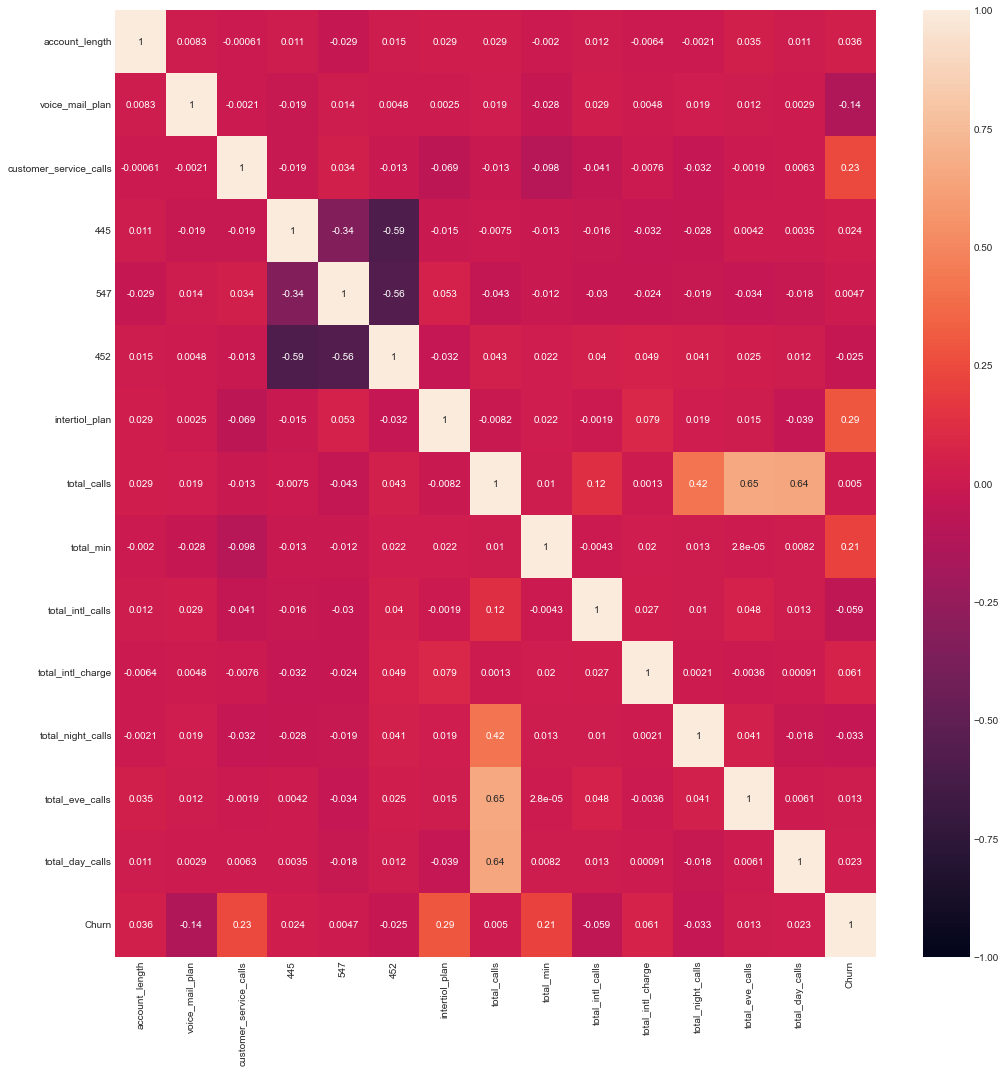

In [91]:
corr_train_sel = df_train[selected_columns].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_train_sel, vmin=-1, vmax=1, annot=True)

# Handle Imbalance of the dataset

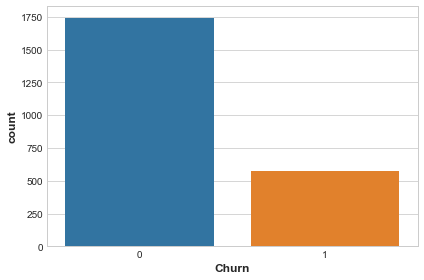

In [75]:
# showing the imbalanced class
sns.countplot(x = 'Churn', data = df_train)
plt.show()

In [117]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [118]:
selected_columns.remove('Churn')
selected_columns

['account_length',
 'voice_mail_plan',
 'customer_service_calls',
 445,
 547,
 452,
 'intertiol_plan',
 'total_calls',
 'total_min',
 'total_intl_calls',
 'total_intl_charge',
 'total_night_calls',
 'total_eve_calls',
 'total_day_calls']

In [119]:
x=df_train_copy[selected_columns]
y=df_train_copy.Churn

In [120]:
x.head()

,account_length,voice_mail_plan,customer_service_calls,445,547,452,intertiol_plan,total_calls,total_min,total_intl_calls,total_intl_charge,total_night_calls,total_eve_calls,total_day_calls
0,15.0,0,2.0,0.0,0.0,1.0,0,254.0,588.3,5.0,4.35,33.0,86.0,130.0
1,105.0,0,3.0,0.0,0.0,1.0,0,234.0,668.9,5.0,3.24,36.0,97.0,96.0
2,97.0,1,5.0,0.0,0.0,1.0,0,256.0,662.7,4.0,1.81,38.0,120.0,94.0
3,121.0,1,1.0,1.0,0.0,0.0,0,210.0,486.7,4.0,3.08,42.0,69.0,95.0
4,98.0,1,0.0,0.0,0.0,1.0,0,279.0,489.0,5.0,2.62,42.0,143.0,89.0


In [121]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

#### use up sampling technique with SMOTE


##### split dataset

In [122]:
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=42)

##### SMOTE

In [ ]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))

print("SMOTE .....")
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())

print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

#### getting dataset

In [ ]:
dataset_train_complete_preprocessed = pd.concat([df_baseline_train['customer_id'], df_train], axis=1).reindex(df_train.index)
dataset_test_complete_preprocessed = pd.concat([df_baseline_test['customer_id'], df_test], axis=1).reindex(df_test.index)